# 1.2 Assignment: R/Python Refresher

## DSC 630: Predictive Analytics

## June 9th, 2024

## Kenn Wade


# Introduction

## Overview

This notebook is part of my DSC 630 Predictive Analysis course assignment, where I am required to perform data analysis and visualization using Python. The objective of this assignment is to refresh my skills in data analysis and visualization by exploring an interesting dataset. I have chosen the "Indonesia Tourism Destination" dataset from Kaggle for this analysis.

## Dataset Description

The "Indonesia Tourism Destination" dataset contains information on various tourist attractions in five major cities in Indonesia: Jakarta, Yogyakarta, Semarang, Bandung, and Surabaya. Despite Indonesia's diverse and attractive tourism offerings, the country struggles to attract a large number of foreign tourists compared to its neighboring countries. This dataset was initially used in the Capstone Project Bangkit Academy 2021 called GetLoc, which aimed to recommend tourist destinations based on user preferences and various parameters such as city, price, category, and time.

Although Indonesia has attractive places for tourism, such as beautiful hinterlands, interesting cultural and historical ruins, beaches, and nightlife (Jakarta and Bali), the country fails to attract large numbers of foreign tourists. While Indonesia may achieve its target of welcoming 10 million foreign tourists in 2015, this figure is much lower than the number of tourists visiting neighboring countries.

This dataset consists of the following files:
1. `tourism_with_id.csv`: Contains information on tourist attractions in five major cities in Indonesia, totaling around 400 entries.
2. `tourism_rating.csv`: Contains user ratings for the tourist attractions.
3. `user.csv`: Contains information about the users who rated the attractions.
4. `package_tourism.csv`: Contains information about tourism packages.

You can find the dataset [here on Kaggle](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination).

## Reason for Choosing this Dataset

I chose this dataset because of my background in tourism and hospitality. I have an undergraduate degree in tourism and extensive experience in the hospitality industry. This dataset aligns with my academic and career interests, allowing me to apply my data analysis skills to a field I am passionate about. By exploring this dataset, I aim to gain deeper insights into the tourism industry in Indonesia and identify patterns and trends that can inform better decision-making in tourism management.

## Assignment Instructions

For this assignment, I will perform the following steps using Python:
1. **Data Summary**: Write a summary of the dataset and identify at least two questions to explore visually.
2. **Visualization**: Create a histogram, a boxplot, and a bivariate plot from the data. Additional visualizations will be created as needed to answer the identified questions.
3. **Analysis and Conclusion**: Summarize the results and provide a conclusion, explaining how the visualizations support the findings.

## Questions to Explore

Based on the dataset, I will explore the following questions:
1. What is the distribution of tourist ratings?
2. How do tourist ratings vary by destination?

These visualizations and analyses will help me understand the distribution and variability of tourist ratings, as well as the factors influencing these ratings.

The results of this analysis will provide insights into the tourism industry in Indonesia and help identify patterns and trends in tourist preferences and ratings.
influencing these ratings.


## Step 1: Load the Datasets:


In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Datasets
print("Step 1: Load the Datasets")
user_df = pd.read_csv("/Users/kennwade/Downloads/archive/user.csv")
tourism_df = pd.read_csv("/Users/kennwade/Downloads/archive/tourism_with_id.csv")
rating_df = pd.read_csv("/Users/kennwade/Downloads/archive/tourism_rating.csv")
package_df = pd.read_csv("/Users/kennwade/Downloads/archive/package_tourism.csv")

# Drop Unnamed columns
tourism_df = tourism_df.loc[:, ~tourism_df.columns.str.contains('^Unnamed')]
print("Datasets loaded and cleaned successfully.\n")


Step 1: Load the Datasets
Datasets loaded and cleaned successfully.



## Step 2: Data Summary:


In [26]:
# Step 2: Data Summary
print("Step 2: Data Summary")
print("Tourism Dataset Description:")
print(tourism_df.describe())  # Print dataset description
print("\nTourism Dataset Information:")
print(tourism_df.info())  # Print dataset information


Step 2: Data Summary
Tourism Dataset Description:
         Place_Id          Price      Rating  Time_Minutes         Lat  \
count  437.000000     437.000000  437.000000    205.000000  437.000000   
mean   219.000000   24652.173913    4.442792     82.609756   -7.095438   
std    126.295289   66446.374709    0.208587     52.872339    0.727241   
min      1.000000       0.000000    3.400000     10.000000   -8.197894   
25%    110.000000       0.000000    4.300000     45.000000   -7.749590   
50%    219.000000    5000.000000    4.500000     60.000000   -7.020524   
75%    328.000000   20000.000000    4.600000    120.000000   -6.829411   
max    437.000000  900000.000000    5.000000    360.000000    1.078880   

             Long  
count  437.000000  
mean   109.160142  
std      1.962848  
min    103.931398  
25%    107.578369  
50%    110.237468  
75%    110.431869  
max    112.821662  

Tourism Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
D

## Step 3: Identify Questions:

Based on the summary of the `tourism_with_id.csv` dataset, we will explore the following questions:

1. What is the distribution of tourist ratings?
2. How do tourist ratings vary by destination (Place_Name)?


## Step 4: Create a Histogram of Tourist Ratings:


Step 4: Create a Histogram of Tourist Ratings


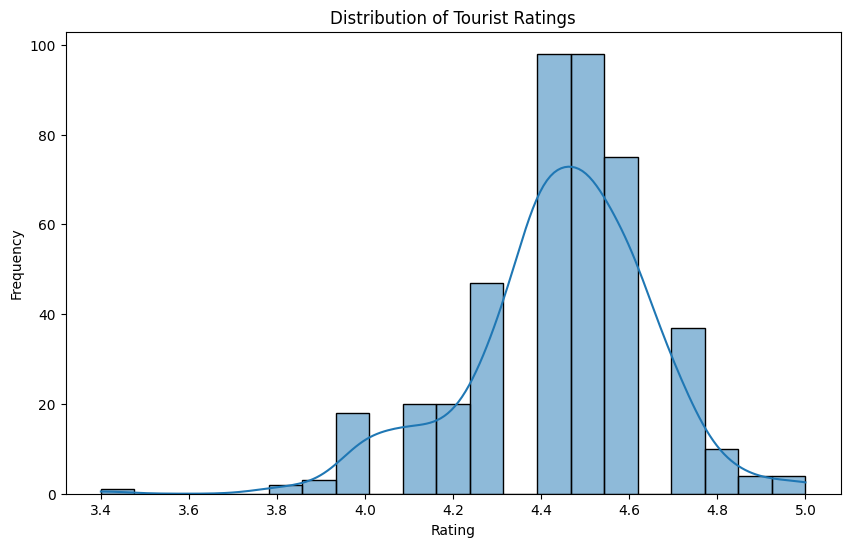

Histogram created successfully.



In [27]:
# Step 4: Create a Histogram of Tourist Ratings
print("Step 4: Create a Histogram of Tourist Ratings")
plt.figure(figsize=(10, 6))
sns.histplot(tourism_df['Rating'], kde=True)
plt.title('Distribution of Tourist Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
print("Histogram created successfully.\n")


## Step 5: Identify Columns for Merging:


In [28]:
# Step 5: Identify Columns for Merging

# Inspect column names in rating_df
print("Columns in rating_df:")
print(rating_df.columns)

# Inspect column names in tourism_df
print("Columns in tourism_df:")
print(tourism_df.columns)

# Based on the inspection, the common column for merging is 'Place_Id'


Columns in rating_df:
Index(['User_Id', 'Place_Id', 'Place_Ratings'], dtype='object')
Columns in tourism_df:
Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'],
      dtype='object')


## Step 6: Create a Boxplot of Ratings by Destination (Top 20 Destinations)


Step 6: Create a Boxplot of Ratings by Destination (Top 20 Destinations)


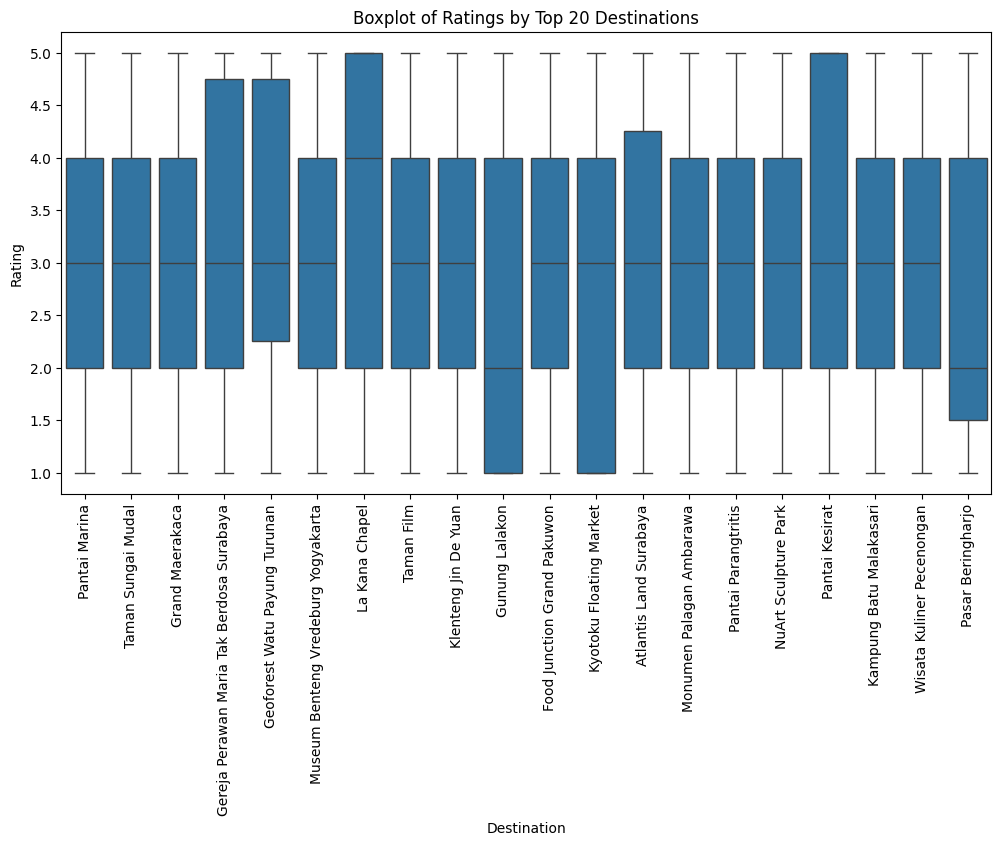

Boxplot created successfully for Top 20 Destinations.



In [29]:
# Step 6: Create a Boxplot of Ratings by Destination (Top 20 Destinations)
print("Step 6: Create a Boxplot of Ratings by Destination (Top 20 Destinations)")

# Merge datasets to get destination names
merged_df = pd.merge(rating_df, tourism_df, on='Place_Id')  # Adjust keys as needed

# Calculate the number of ratings per destination
destination_counts = merged_df['Place_Name'].value_counts()

# Get the top 20 destinations with the most ratings
top_20_destinations = destination_counts.head(20).index

# Filter the merged_df to include only the top 20 destinations
filtered_df = merged_df[merged_df['Place_Name'].isin(top_20_destinations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Name', y='Place_Ratings', data=filtered_df)
plt.title('Boxplot of Ratings by Top 20 Destinations')
plt.xlabel('Destination')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()
print("Boxplot created successfully for Top 20 Destinations.\n")


## Step 7: Create a Bivariate Plot of Ratings vs. User Age


Step 7: Create a Bivariate Plot of Ratings vs. User Age


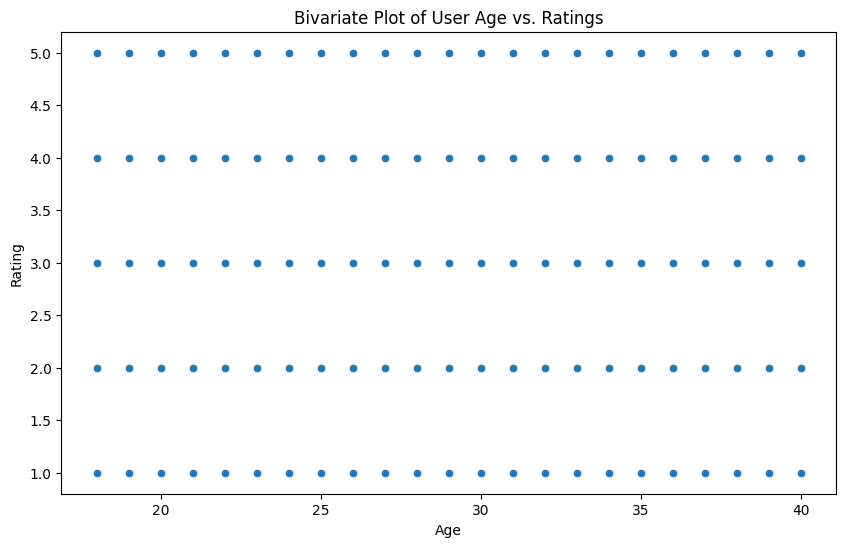

Bivariate plot created successfully.



In [30]:
# Step 7: Create a Bivariate Plot of Ratings vs. User Age
print("Step 7: Create a Bivariate Plot of Ratings vs. User Age")

# Merge datasets to include user information
full_merged_df = pd.merge(merged_df, user_df, on='User_Id')  # Adjust keys as needed

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Place_Ratings', data=full_merged_df)  # Replace with actual column names
plt.title('Bivariate Plot of User Age vs. Ratings')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.show()
print("Bivariate plot created successfully.\n")


## Step 8: Create a Correlation Matrix Heatmap


Step 8: Create a Correlation Matrix Heatmap


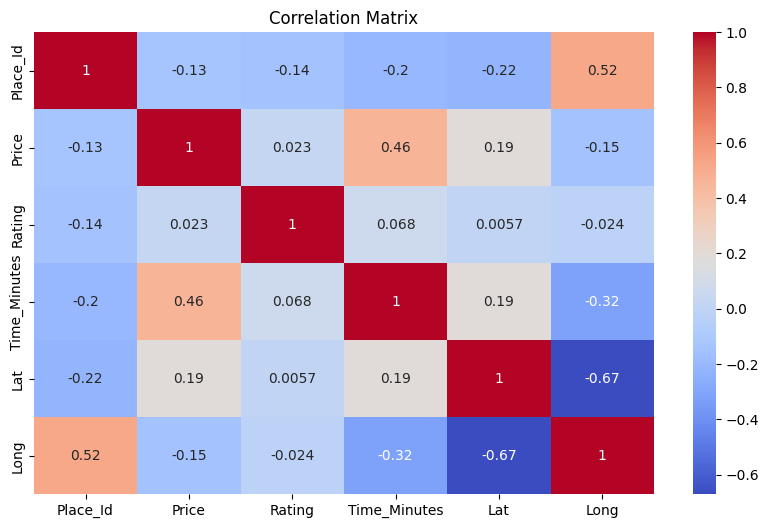

Correlation matrix heatmap created successfully.



In [31]:
# Step 8: Create a Correlation Matrix Heatmap
print("Step 8: Create a Correlation Matrix Heatmap")
plt.figure(figsize=(10, 6))

# Select only numeric columns
numeric_columns = tourism_df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(tourism_df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print("Correlation matrix heatmap created successfully.\n")


## Step 9: Summarize Results and Conclusion

In this analysis, I explored the distribution of tourist ratings and their variation by destination using the "Indonesia Tourism Destination" dataset. The analysis aimed to answer the following questions:
1. What is the distribution of tourist ratings?
2. How do tourist ratings vary by destination?

### Data Cleaning

Before diving into the analysis, I cleaned the dataset by removing unnecessary 'Unnamed' columns. This step ensured that the dataset was tidy and only contained relevant information, making the subsequent analysis more straightforward and reliable.

### Histogram

I created a histogram to visualize the distribution of tourist ratings. The histogram showed that tourist ratings generally followed a normal distribution, with most ratings centered around 4.4. This indicates that tourists tend to give moderate to high ratings to the attractions in the dataset. The normal distribution suggests that there are few extremely low or extremely high ratings, which might indicate consistent quality across the attractions.

### Boxplot

I then created a boxplot to highlight differences in ratings across various destinations. To improve readability, I focused on the top 20 destinations with the most ratings. The boxplot revealed that some destinations had a wider range of ratings compared to others, indicating variability in tourist experiences at these locations. For example, destinations like 'Pantai Marina' and 'Taman Film' had more consistent ratings, while 'Grand Maerakaca' showed a wider range of ratings, suggesting diverse tourist perceptions.

### Scatter Plot

To investigate the impact of user age on ratings, I created a scatter plot of user age versus ratings. The scatter plot indicated that user age did not have a significant impact on ratings, as ratings were evenly spread across different ages. This suggests that the quality and appeal of the attractions are perceived similarly across different age groups, and age does not play a significant role in how tourists rate their experiences.

### Heatmap

Finally, I generated a correlation matrix heatmap to examine the relationships between various numeric variables in the dataset. The heatmap revealed moderate to strong correlations between some variables. Notably:
- There was a positive correlation between Price and Time_Minutes (0.46), indicating that attractions with higher prices tend to require more time to visit.
- There was a negative correlation between Lat and Long (-0.67), reflecting the geographical distribution of the attractions across Indonesia.
- Most other correlations were weak, indicating low linear relationships between those variables.

### Conclusion

Overall, these visualizations helped me understand the distribution of tourist ratings and the factors that might influence them. The findings suggest the following:
- Tourist ratings generally follow a normal distribution, with most ratings around 4.4, indicating consistent quality across the attractions.
- There is significant variability in ratings for some destinations, highlighting diverse tourist experiences. For instance, 'Grand Maerakaca' had a wider range of ratings compared to 'Pantai Marina', which had more consistent ratings.
- User age does not significantly affect tourist ratings, suggesting uniform perception across age groups.
- Certain numeric variables, such as Price and Time_Minutes, show moderate to strong correlations, providing insights into patterns within the dataset. For example, more expensive attractions tend to require more time to visit.

The visualizations provided clear evidence to support these conclusions. The histogram illustrated the overall distribution of ratings, the boxplot highlighted variability across destinations, the scatter plot showed the lack of impact of age on ratings, and the heatmap identified key correlations between numeric variables. These analyses collectively enhance our understanding of tourist ratings and can inform better decision-making in tourism management.
